This is a UPI Detection Project that involves 6 different algorithms, 6 seperate datasets are used for each of the services. All the 6 services are stated below: 

1. Vishing 
2. Fake payments and Transfer 
3. Fake QR code 
4. Impersonation 
5. Phishing 
6. Malware 

# Vishing 
 Implemented using Random Forest 


In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


In [5]:

# Load the data
data = pd.read_csv(r"D:\Shiash Info Internship\Datasets\vishing_data.csv")  # Replace "your_data.csv" with the path to your CSV file


# Preprocessing: Convert timedelta columns to numerical features
data['Answer Speed (AVG)'] = pd.to_timedelta(data['Answer Speed (AVG)']).dt.total_seconds()
data['Talk Duration (AVG)'] = pd.to_timedelta(data['Talk Duration (AVG)']).dt.total_seconds()
data['Waiting Time (AVG)'] = pd.to_timedelta(data['Waiting Time (AVG)']).dt.total_seconds()

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Vishing'])
y = data['Vishing']


# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Vishing'])
y = data['Vishing']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# Fake Payments and Transfer 
Implemented using Support Vector Machine

Accuracy: 0.48
ROC AUC Score: 0.5249597423510467


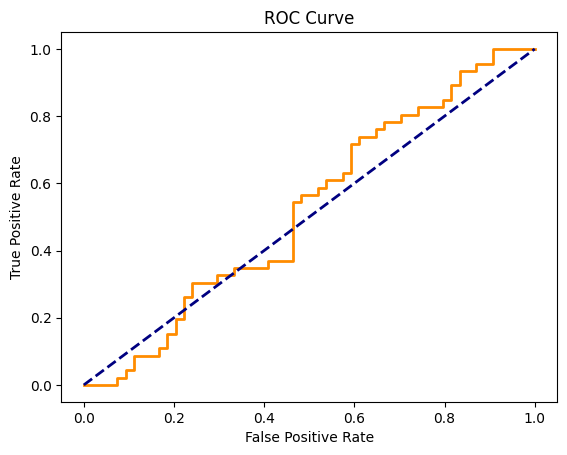

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = "D:/Shiash Info Internship/Datasets/fake_payments_dataset.csv"
data = pd.read_csv(file_path)

# Split features and target
X = data.drop('Receipt_Details', axis=1)
y = data['Receipt_Details']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)

# Plot ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Fake QR Code Detection 
Implemented using CNN

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Load images and labels
def load_data(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        img = tf.keras.preprocessing.image.load_img(os.path.join(directory, filename), target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
        labels.append(1 if filename.startswith('real') else 0)  # 1 for real QR codes, 0 for fake
    return np.array(images), np.array(labels)

# Path to the directory containing generated QR codes
dataset_dir = r'D:\Shiash Info Internship\Datasets\qr_dataset'  # Update this with the correct directory path

# Load data
images, labels = load_data(dataset_dir)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
model.save("qr_classifier_model.h5")



Epoch 1/10
200/200 [==============================] - 346s 2s/step - loss: 0.0199 - accuracy: 0.9991 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
200/200 [==============================] - 332s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
200/200 [==============================] - 332s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
200/200 [==============================] - 312s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
200/200 [==============================] - 304s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
200/200 [==============================] - 319s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
200/200 [==============================] - 321s 2s/step - loss: 0.0000e+00 - accuracy: 

c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import streamlit as st
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load images and labels
def load_data(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        img = load_img(os.path.join(directory, filename), target_size=(224, 224))
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(1 if filename.startswith('real') else 0)  # 1 for real QR codes, 0 for fake
    return np.array(images), np.array(labels)

# Path to the directory containing generated QR codes
dataset_dir = r'D:\Shiash Info Internship\Datasets\qr_dataset'  # Update this with the correct directory path

# Load data
images, labels = load_data(dataset_dir)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

# Save the model
model.save("qr_classifier_model.h5")

# Streamlit app for QR code classification
def load_model():
    model = tf.keras.models.load_model("qr_classifier_model.h5")
    return model

def preprocess_image(image):
    img = load_img(image, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model input shape
    return img_array

def predict_qr(image, model):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    if prediction < 0.5:
        return "Fake QR"
    else:
        return "Correct QR"

def main():
    st.title("QR Code Classifier")
    uploaded_file = st.file_uploader("Upload QR Code Image", type=["jpg", "png", "jpeg"])

    if uploaded_file is not None:
        st.image(uploaded_file, caption='Uploaded QR Code Image', use_column_width=True)
        model = load_model()
        prediction = predict_qr(uploaded_file, model)
        st.write("Prediction:", prediction)

if __name__ == "__main__":
    main()


Epoch 1/3
200/200 [==============================] - 361s 2s/step - loss: 0.1349 - accuracy: 0.9973 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/3
200/200 [==============================] - 384s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
200/200 [==============================] - 413s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2024-04-10 23:04:58.357 
  command:

    streamlit run C:\Users\priya\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


# Impersonation
Implemented Using LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load the dataset
data = pd.read_csv(r"D:\Shiash Info Internship\Datasets\Impersonation.csv")

# Encode categorical variables
label_encoder = LabelEncoder()
# Assuming 'Fraudulent' is the only categorical variable you've mentioned.
# If there are other categorical variables, you should encode them here.
data['Fraudulent'] = label_encoder.fit_transform(data['Fraudulent'])

# Separate features and target variable
X = data.drop(columns=['Fraudulent'])
y = data['Fraudulent']

# Check if there are any non-numeric columns left in X and encode them
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM
X_lstm = np.array(X_scaled).reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming the rest of your code is the same as before

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Since the model outputs probabilities, we need to convert these to class labels
# Assuming binary classification, we can use a threshold of 0.5
y_pred_labels = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

# Print the metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Epoch 1/10
8/8 [==============================] - 8s 167ms/step - loss: 0.6923 - accuracy: 0.5285 - val_loss: 0.6920 - val_accuracy: 0.4677
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6894 - accuracy: 0.5569 - val_loss: 0.6896 - val_accuracy: 0.4677
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6850 - accuracy: 0.6220 - val_loss: 0.6846 - val_accuracy: 0.6613
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6772 - accuracy: 0.7480 - val_loss: 0.6749 - val_accuracy: 0.7903
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6630 - accuracy: 0.7724 - val_loss: 0.6567 - val_accuracy: 0.7258
Epoch 6/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6393 - accuracy: 0.7602 - val_loss: 0.6255 - val_accuracy: 0.7097
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6013 - accuracy: 0.7520 - val_loss: 0.5788 - val_accuracy: 0.7097
Epoch 8/10
8/8 [================

# Phishing 
Implemented Using Gradient Boost Machine


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer

# Load dataset from CSV file
dataset_path = r'D:\Shiash Info Internship\Datasets\email_dataset.csv' # Provide the path to your dataset
data = pd.read_csv(dataset_path)

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['Sender', 'Subject', 'Hyperlink'])

# Convert 'Body' column to numerical format using CountVectorizer
vectorizer = CountVectorizer()
X_body = vectorizer.fit_transform(data['Body']).toarray()

# Drop 'Body' column from the original DataFrame and concatenate with the numerical 'Body'
X = data.drop(['Body', 'Additional_Word'], axis=1)
X = pd.concat([X, pd.DataFrame(X_body)], axis=1)

# Convert all column names to strings
X.columns = X.columns.astype(str)

# Split features and target
y = data['Additional_Word']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Machine (GBM) model
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

# Make predictions
y_pred = gbm_model.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.01875
Precision: 0.02537828947368421
Recall: 0.01875


c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Malware Detection 
Implemented Using Random Forest 

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'D:\Shiash Info Internship\Datasets\Malware dataset.csv')
# Convert the 'classification' column to numerical values
df['classification'] = df['classification'].map({'malware': 1, 'benign': 0})
from sklearn.model_selection import train_test_split

# Assuming all columns except 'hash' and 'classification' are features
X = df.drop(columns=['hash', 'classification'])
y = df['classification']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f"True Positives: {tp}")
print(f"False Negatives: {fn}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")


RandomForestClassifier(random_state=42)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10030
           1       1.00      1.00      1.00      9970

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

True Positives: 9970
False Negatives: 0
True Negatives: 10030
False Positives: 0
